In [26]:
import re
import string

from bs4 import BeautifulSoup
from nltk.corpus import stopwords

import numpy as np
import pandas as pd
import sklearn as skl
import matplotlib.pyplot as plt
%matplotlib inline

In [43]:
import matplotlib as mpl
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 22}

mpl.rc('font', **font)

In [2]:
import nltk
# nltk.download("stopwords")

In [3]:
def removePunctuation(x):
    # Lowercasing all words
    x = x.lower()
    # Removing non ASCII chars
    x = re.sub(r'[^\x00-\x7f]',r' ',x)
    # Removing (replacing with empty spaces actually) all the punctuations
    return re.sub("["+string.punctuation+"]", " ", x)

In [4]:
stops = set(stopwords.words("english"))
def removeStopwords(x):
    # Removing all the stopwords
    filtered_words = [word for word in x.split() if word not in stops]
    return " ".join(filtered_words)

In [2]:
dataframe_raw = {
    "cooking": pd.read_csv("../data/cooking.csv"),
    "crypto": pd.read_csv("../data/crypto.csv"),
    "robotics": pd.read_csv("../data/robotics.csv"),
    "biology": pd.read_csv("../data/biology.csv"),
    "travel": pd.read_csv("../data/travel.csv"),
    "diy": pd.read_csv("../data/diy.csv"),
}

In [4]:
def printExample(df):
    example = df.sample(1)
    print("Title: " + str(example['title'].values[0]))
    if 'tags' in df.columns:
            print("Tags: " + str(example['tags'].values[0]))
    print(str(example['content'].values[0]))
printExample(dataframe_raw['biology'])

Title: Is there a scientific proof that smoking spoils face skin?
Tags: skin smoking
<p>I saw that cigarettes-smokers (more than 3 cigarettes per day) often have the skin of the face which is a little bit spoiled.</p>

<p>Is there any scientific proof that cigarette smoke (or the nicotine inside it) is a damaging fator for face skin?</p>

<p>Or it is just due to the skin-smoke interaction casued by the smoke that the person breaths out from the mouth?</p>



In [5]:
test = pd.read_csv('../data/test.csv')
printExample(test)

Title: Homotopy and homology groups in physics
<p>What is the connection between homotopy and homology groups and physics?<br>
When does one want or need to find invariants of manifolds in physics?<br>
Not interested in string theory.<br>
Narrow down how? Please help. Feel free to edit</p>



In [11]:
dataframe = {
    "cooking": pd.read_csv("../data/cooking_light.csv"),
    "crypto": pd.read_csv("../data/crypto_light.csv"),
    "robotics": pd.read_csv("../data/robotics_light.csv"),
    "biology": pd.read_csv("../data/biology_light.csv"),
    "travel": pd.read_csv("../data/travel_light.csv"),
    "diy": pd.read_csv("../data/diy_light.csv"),
}

In [8]:
dataframe['diy'].sample(3)[["title", "content", "tags"]]

,title,content,tags
19459,sort driver works center screw hinge,door like latch latch must pull sharply doorkn...,"['tools', 'hinges']"
14494,recommended method fix sunken garage floor slab,attached one car garage floor slab seems sunke...,"['concrete', 'garage', 'slab']"
25307,diagnose fridge freezer problem,hotpoint rfa52 iced diamond fridge freezer rfa...,['refrigerator']


In [9]:
test.shape

(81926, 3)

In [12]:
dataframe['physics'] = test

In [22]:
dataframe.keys()

dict_keys(['travel', 'crypto', 'cooking', 'biology', 'robotics', 'diy', 'physics'])

In [63]:
topics = list()
nExamples = list()
nTags = list()
tagsHist = list()
for topic in dataframe.keys():
    topics.append(topic)
    nExamples.append(dataframe[topic].shape[0])
    if topic == 'physics':
        nTags.append(0)
        print(topic + ": " + str(nExamples[-1]))
    else:
        tagCountList = [len(row['tags'].split('\', \'')) for i, row in dataframe[topic].iterrows()]
        nTags.append(np.sum(tagCountList))
        tagsHist.extend(tagCountList)
        print(topic + ": " + str(nExamples[-1]) + " tags: " + str(nTags[-1]))

travel: 19279 tags: 65334
crypto: 10432 tags: 25484
cooking: 15404 tags: 35542
biology: 13196 tags: 33129
robotics: 2771 tags: 6520
diy: 25918 tags: 59129
physics: 81926


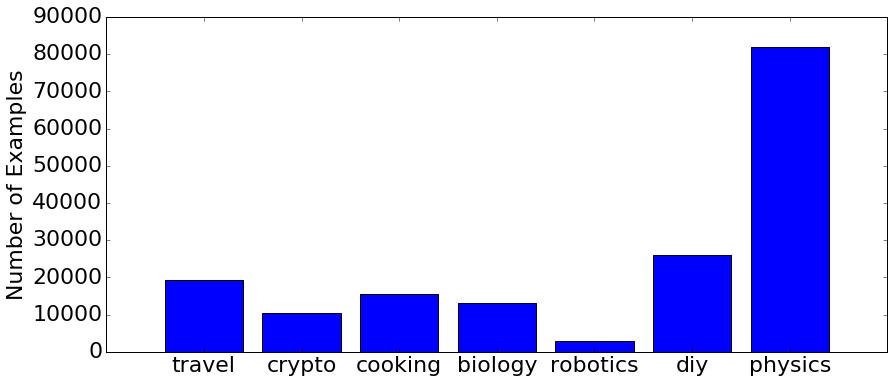

In [46]:
x = np.arange(len(nExamples))
plt.figure(figsize=(14,6))
plt.bar(x, nExamples, align='center')
plt.xticks(x, topics)
plt.ylabel("Number of Examples")

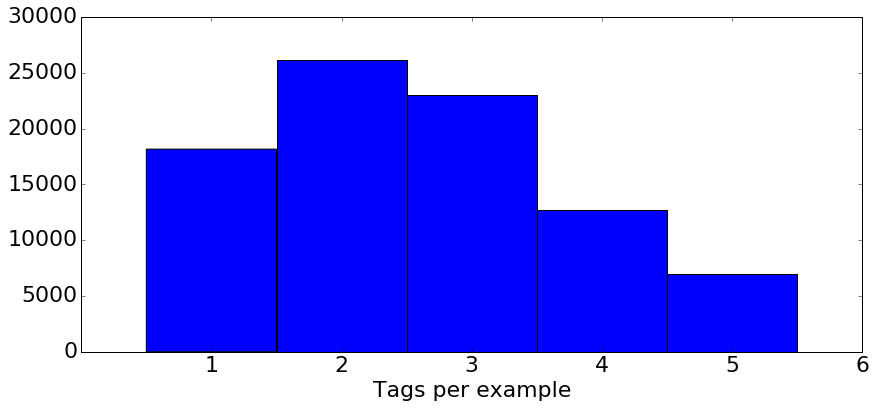

In [84]:
bins=np.arange(1,7)
plt.figure(figsize=(14,6))
plt.hist(tagsHist, align='left', bins=bins)
plt.xticks(bins)
plt.xlabel("Tags per example")

In [60]:
dataframe['crypto']['tags'].apply(lambda x: len(x.split('\', \''))).sort_values(ascending=False)

1149    5
4608    5
7905    5
7910    5
4576    5
4562    5
4561    5
7940    5
7942    5
4534    5
4524    5
4523    5
1198    5
4513    5
7967    5
4506    5
7974    5
7978    5
4483    5
4474    5
1222    5
4604    5
4609    5
9730    5
9783    5
1023    5
4745    5
1030    5
1031    5
7815    5
       ..
1715    1
5404    1
4285    1
1712    1
9499    1
5407    1
5408    1
1708    1
5410    1
5411    1
1725    1
7493    1
8764    1
1728    1
1746    1
5380    1
8763    1
5382    1
1741    1
1740    1
7502    1
1738    1
5385    1
4295    1
3108    1
1734    1
5389    1
5390    1
5392    1
6761    1
Name: tags, dtype: int64